# Lineer Regresyon Varsayımları 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [4]:
Humidity Wind Speed (km/h) Pressure (millibars) Wind Bearing (degrees)

SyntaxError: invalid syntax (<ipython-input-4-026df5b06395>, line 1)

In [ ]:
df.Humidity.unique()

In [5]:
df['Wind Speed (km/h)'].unique()

array([14.1197, 14.2646,  3.9284, ..., 37.0622, 35.5971, 30.751 ])

In [6]:
df['Pressure (millibars)'].unique()

array([1015.13, 1015.63, 1015.94, ...,  998.11,  998.52,  997.59])

In [7]:
df['Wind Bearing (degrees)'].unique()

array([251., 259., 204., 269., 258., 260., 279., 290., 316., 281., 289.,
       262., 288., 230., 163., 139., 147., 160., 152., 150., 149., 180.,
       161., 135., 141., 151., 169., 170., 187., 179., 162., 159., 168.,
        32., 140., 103., 113., 129., 207., 153.,   4., 341.,  15., 348.,
       321., 311., 339., 340., 330.,  19., 277.,   9.,   0., 350., 349.,
       338., 320., 310., 328.,  20.,  28.,  11., 326., 309., 193., 273.,
       300., 307., 319., 318., 243., 177., 172., 142., 130., 359., 166.,
       145., 178., 223., 240., 231., 214., 222., 241., 235., 238., 211.,
       221., 215., 224., 358.,   8.,  59.,  63.,  65., 146., 305., 327.,
       271., 297., 301., 308., 272., 351., 175., 138., 158., 132., 209.,
       250., 295., 280., 270., 239., 242., 266., 278., 325., 282., 274.,
       255.,  46., 284., 283., 313., 345.,  16., 332.,  12.,  39.,   3.,
        33.,  24.,  25.,  31.,  47.,  67.,  60., 144.,  57.,   2.,  18.,
        48.,  29., 335., 228., 315.,  40., 143., 13

In [8]:
df.isnull().sum()*100/df.shape[0]

Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64

Temperature (C) değişkeni bizim hedef değişkenimiz

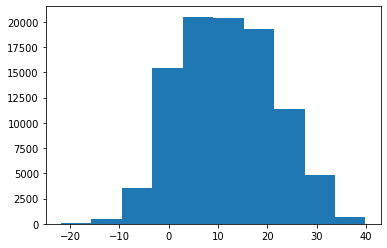

In [9]:
plt.hist(df['Temperature (C)'])
plt.show()

In [10]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [11]:
jb_stats =jarque_bera(df['Temperature (C)'])
norm_stats = normaltest(df['Temperature (C)'])

In [12]:
jb_stats

(1433.6419797355118, 0.0)

In [13]:
norm_stats

NormaltestResult(statistic=2781.3146430107745, pvalue=0.0)

Hedef değişkenimiz normal dağılımlıma sahip değil.

In [14]:
Y = df['Temperature (C)']
X =df[['Humidity','Wind Speed (km/h)','Pressure (millibars)',"Wind Bearing (degrees)"]]

In [20]:
from sklearn import linear_model

lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Artık elimizde istediğimiz değerlerle çalıştırılmış ve bir sonuca ulaşılmış bir Lineer Regresyon formülü var.

Temperature (C) = B0 + B0*Humidity + B2*Wind Speed (km/h) + B3*Pressure (millibars) + B4 *Wind Bearing (degrees)

In [21]:
print("Variables: \n",lrm.coef_)
print("Bias : \n",lrm.intercept_)

Variables: 
 [-3.24962454e+01 -2.01413742e-01 -6.91759209e-04  4.04836936e-03]
Bias : 
 37.92643818528595


## Varsayım 2: Hata terimi ortalamada sıfır olmalıdır

In [22]:
tahmin = lrm.predict(X)
hatalar = Y - tahmin
print("Tıbbi maliyetler modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))

Tıbbi maliyetler modelinin ortalama hatası : -0.000000000000004


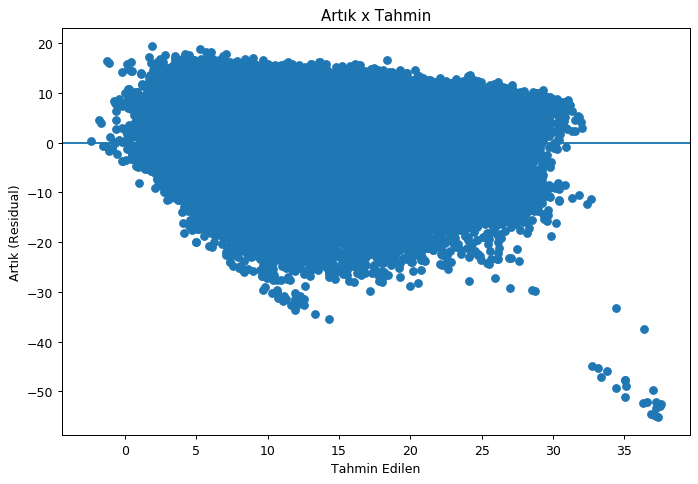

In [42]:
plt.figure(figsize=(9,6), dpi=90)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Artık (Residual)')
plt.axhline(y=0)
plt.title('Artık x Tahmin')
plt.show()

In [43]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 2464.84 ve p değeri : 0.000000000000000000000
Levene test değeri   : 2321.24 ve p değeri : 0.000000000000000000000


Her iki testin p değerleri 0.05'ten düşüktür. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

## Varsayım 3: homoscedasticity

In [25]:
import statsmodels.api as sm

X= sm.add_constant(X)
result= sm.OLS(Y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:49:24   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Varsayım 5: hata terimleri birbiriyle ilişkisiz olmalıdır

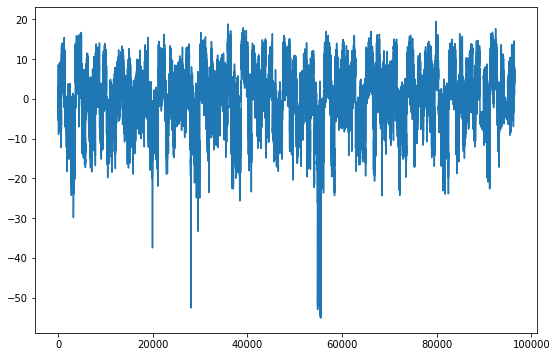

In [44]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

Hatalar arasındaki korelasyonlara bakmanın bir başka yolu da otokorelasyon fonksiyonunu kullanmaktır. Bu fonksiyon, bir değişkenin kendi ile korelasyonunu hesaplar. Bizim durumumuzda, hataların sırası gözlemlerin emirleridir. Acf() fonksiyonunu statsmodels'den şu şekilde kullanabiliriz:

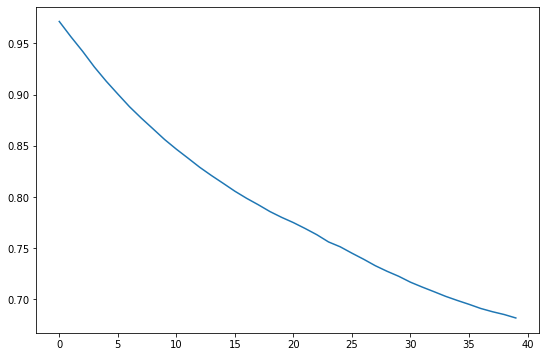

In [45]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

hataları arasındaki otokorelasyon gerçekten çok düşüktür (0,95 ile 0,70 arasında).